In [14]:
import pandas as pd
solar = pd.read_csv('data/solarpower.csv')

print(round(solar['cum_power'].mean(), 0))

23776.0


In [15]:
solar[solar['cum_power'] == -1]

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


In [16]:
for i in range(solar.shape[0]):
    if solar['cum_power'][i] == -1:
        solar['cum_power'][i] = (solar['cum_power'][i+1]+solar['cum_power'][i-1]) / 2

print(round(solar['cum_power'].mean(), 0))

23848.0


/tmp/ipykernel_65323/242654879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['cum_power'][i] = (solar['cum_power'][i+1]+solar['cum_power'][i-1]) / 2


In [17]:
solar

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [19]:
solar['date'] = pd.to_datetime(solar['date']).dt.to_period('M')
solar

,date,cum_power
0,2017-01,20111.0
1,2017-01,20112.0
2,2017-01,20115.0
3,2017-01,20117.0
4,2017-01,20119.0
...,...,...
659,2018-10,28101.0
660,2018-10,28109.0
661,2018-10,28115.0
662,2018-10,28117.0


In [28]:
solar['day_power'] = solar['cum_power'].diff()
solar_plot = solar.groupby(by='date')['day_power'].mean()
solar_plot

date
2017-01     3.233333
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

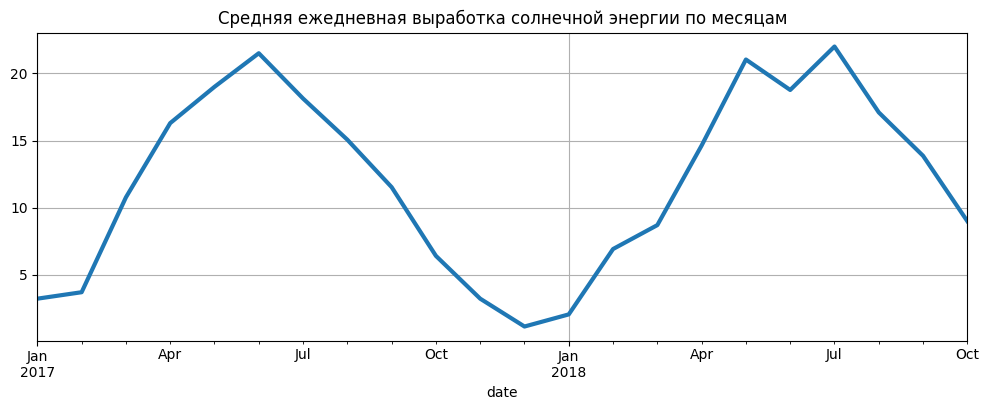

In [29]:
solar_plot.plot(
    kind='line',
    figsize=(12, 4),
    title='Средняя ежедневная выработка солнечной энергии по месяцам',
    grid = True,
    lw=3
);
